### Questions

### Objectives
YWBAT 
* apply the clt (central limit theorem) to find the mean and std of a population
* define the clt
    * a statistic across multiple samples (a sampling distribution) will be normal, centered on the population statistic
* use sampling to find sampling statistics

### Outline
* Watch Mr. Nystrom
* Make some data
* apply clt to find stats on our data

In [4]:
import pandas as pd
import numpy as np

import scipy.stats as scs

import matplotlib.pyplot as plt

np.random.seed(42)

In [3]:
def make_hist(arr):
    plt.figure(figsize=(5, 5))
    plt.grid(linestyle='dashed')
    plt.hist(arr, color='r', alpha=0.5)
    plt.show()

## Create some non normal data

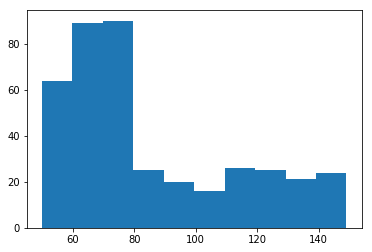

In [7]:
# height of a population
# we don't know what our data is
population1 = np.random.randint(50, 80, size=200)
population2 = np.random.randint(60, 150, size=200)

population = np.column_stack([population1, population2]).flatten()

plt.hist(population)
plt.show()

In [13]:
# let's take 30 samples

# let's calculate the mean of the population, acting like we don't know the population

samp_means = []

for i in range(30):
    # took a sample of 40 people
    samp = np.random.choice(population, size=40)
    # calculated the mean
    samp_mean = samp.mean()
    # add that to our samp_means
    samp_means.append(samp_mean)
    
print(samp_means)

[84.275, 88.7, 77.475, 85.3, 81.5, 78.0, 81.05, 78.25, 87.425, 92.45, 83.275, 84.425, 88.9, 84.0, 87.775, 78.175, 85.2, 89.3, 81.0, 86.675, 92.075, 89.075, 89.525, 79.875, 83.925, 81.8, 88.175, 87.5, 83.875, 81.375]


In [14]:
estimated_mean = np.mean(samp_means)
true_mean = population.mean()

estimated_mean, true_mean, np.abs(estimated_mean-true_mean)

(84.67833333333334, 84.8975, 0.21916666666665208)

#### notice we were only off by 0.219

### How confident are we about this mean? 

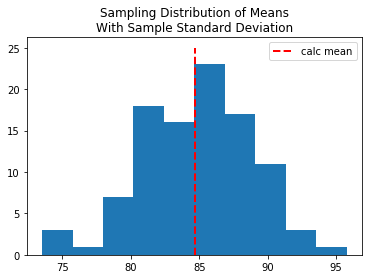

In [18]:
estimated_mean = np.mean(samp_means)
sample_standard_deviation = np.std(samp_means, ddof=1)

hyp_dis_of_mean = np.random.normal(estimated_mean, sample_standard_deviation, size=100)

plt.hist(hyp_dis_of_mean)
plt.title("Sampling Distribution of Means\nWith Sample Standard Deviation")
plt.vlines(x=estimated_mean, ymin=0, ymax=25, linestyle='dashed', 
           linewidth=2, colors='r', label='calc mean')
plt.legend()
plt.show()

In [20]:
lower_99 = estimated_mean - 3*sample_standard_deviation
upper_99 = estimated_mean + 3*sample_standard_deviation

lower_99, upper_99

(71.99568057318561, 97.36098609348107)

In [22]:
lower_67 = estimated_mean - 1*sample_standard_deviation
upper_67 = estimated_mean + 1*sample_standard_deviation

lower_67, upper_67

(80.4507824132841, 88.90588425338258)

### Assessment